In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True) # For better representation

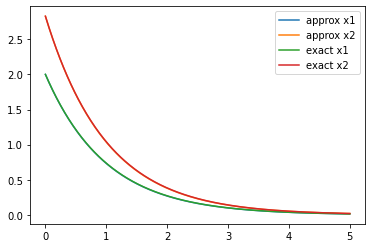

1.66581653270273


In [3]:
#Initial Conditions
x = np.array([2.0, 2*np.sqrt(2)])
# Time Step
h = 1e-2

#Start your solution to eulers
xt = [x.copy()]

t = 0
t_vals = [t]
# Eulers
for i in range(int(5/h)):
    x0_p = x[0]
    x1_p = x[1]
    x[0] = x0_p + h*(-3*x0_p + (2**(0.5))*x1_p)
    x[1] = x1_p + h*((2**(0.5))*x0_p - 2*x1_p)
    # Append Next Solution Step
    xt.append(x.copy())
    # increment t by step
    t += h
    t_vals.append(t)

# Solutions
xt = np.array(xt)
# Values of t
t_vals = np.array(t_vals)

plt.figure()
plt.plot(t_vals, xt[:, 0], label = 'approx x1')
plt.plot(t_vals, xt[:, 1], label = 'approx x2')

# Actual Solutions
y1 = 2*(np.exp(-t_vals))
y2 = 2*np.sqrt(2)*np.exp(-t_vals)
y = np.stack([y1, y2], axis = 1)
plt.plot(t_vals, y1, label = 'exact x1')
plt.plot(t_vals, y2, label = 'exact x2')

plt.legend()
plt.show()

# Calculate and print distance between solutions
dist = np.sqrt(((y - xt)**2).sum(axis = 1)).sum()
print(dist)


In [4]:

#<=========================== Question 2 =========================>
def Q4(m,r,k,u0,v0):
    t = sp.symbols('t')
    u = sp.Function('u')


    du = u(t).diff(t, 1)
    d2u = u(t).diff(t, 2)

    equation = sp.Eq(m * d2u + r * du + k * u(t), 0)

    if (m <= 0) or (k <= 0) or (r < 0 ):
        position = 0
        category = ' it is not a spring model'
    else:
        mu = r**2 - 4*m*k
        if r == 0:
            category = 'undamped'
        elif mu > 0:
            category = 'overdamped'
        elif mu == 0:
            category = 'critically damped'
        else:
            category ='underdamped'

        position = sp.dsolve(equation, u(t), ics={u(0): u0, du.subs(t, v0): v0})

    return position, category


Category undamped and solution:


Category underdamped and solution:


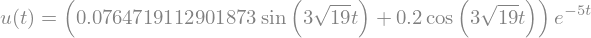

Category critically damped and solution:


Category overdamped and solution:


Category  it is not a spring model and solution:


Category underdamped and solution:


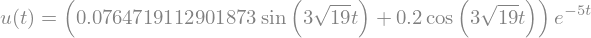

<Figure size 640x480 with 0 Axes>

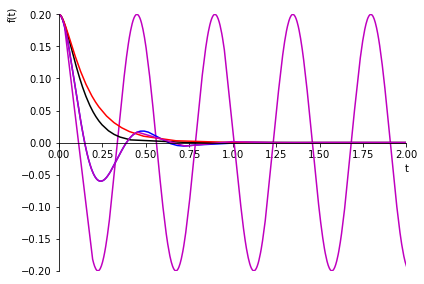

In [6]:

mm = [1, 1, 1, 1, -1, 1];
rr = [0, 10, 28, 36, 0, 10];
kk = [196, 196, 196, 196, -4, 196];
uu0 = [0.2, 0.2, 0.2, 0.2 ,0.2, 0.2];
vv0 = [0, 0, 0, 0, 0, 0];
colorr = [ 'm','b','k','r','g', 'm'];
plt.figure(figsize=(8, 6), dpi=80)
p = None

for i in range(len(mm)):
    m = mm[i]
    r = rr[i]
    k = kk[i]
    u0 = uu0[i]
    v0 = vv0[i]
    color = colorr[i]

    position, category = Q4(m,r,k,u0,v0)
    print("Category {} and solution:".format(category))
    display(position)
    if position != 0:
        p1 = plot(position.rhs, xlim=(0,2), ylim=(-0.2, 0.2), show=False, line_color=colorr[i], legend=False)
        if p:
            p.extend(p1)
        else:
            p = p1


p.show()